# Distribución Gaussiana

## Importamos librerías

In [102]:
import numpy as np
from probability_helper import plot_normalized_histogram_sorted
from matplotlib import pyplot as plt

## Cargamos datos y graficamos

In [103]:
gran_danes_pesos = np.load('data/gran_danes_pesos.npy')

In [104]:
len(gran_danes_pesos)

1000

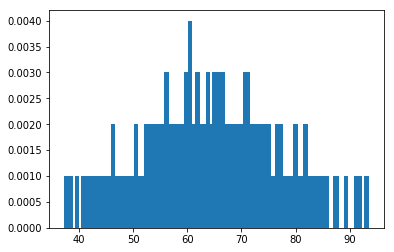

In [264]:
espacio_muestral_1, probs_gran_danes_pesos_1 = plot_normalized_histogram_sorted(gran_danes_pesos)

In [265]:
print(len(espacio_muestral_1), espacio_muestral_1[:10])

852 [ 37.67  38.02  38.56  39.67  40.74  40.78  40.82  41.54  41.62  41.68]


### Cuantos bins tiene nuestro histograma?
852, casi tantos como mediciones de pesos tengo (1000)

### Cuantas mediciones caen en cada bin?
En algunos 1, en otros 2, 3, y en uno solo 4

Claramente no son suficientes mediciones de peso por bin

In [81]:
print(probs_gran_danes_pesos_1[:10])

[ 0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001]


### Es una buena estimación de la probabilidad este histograma normalizado?
- El peso ahora es una V.A continua. Por lo que desde un punto teorico podria tomar infinitos puntos entre dos numeros enteros. 
- Desde un punto de vista práctico la presición de la medición fue de la centésima
- La mayoria de las probabilidades estimadas es de 0.001 (1/1000), es decir, una medición de ese peso particular dentro de los 1000

## Modelo de Histograma 1:
Redondeamos al entero más proximo

### Graficamos

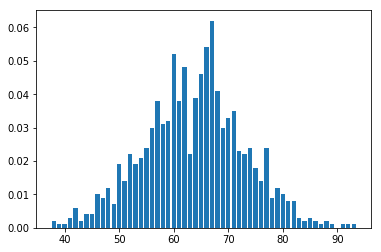

In [178]:
gran_danes_pesos_rounded = np.round(gran_danes_pesos)
espacio_muestral_2, probs_gran_danes_pesos_2 = plot_normalized_histogram_sorted(gran_danes_pesos_rounded)

In [205]:
print(espacio_muestral_2)
print(probs_gran_danes_pesos_2)
print(len(espacio_muestral_2), 1000/len(espacio_muestral_2))

[ 38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.
  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  91.  92.  93.]
[ 0.002  0.001  0.001  0.003  0.006  0.002  0.004  0.004  0.01   0.009
  0.012  0.007  0.019  0.014  0.022  0.019  0.021  0.024  0.03   0.038
  0.031  0.032  0.052  0.038  0.048  0.022  0.039  0.046  0.054  0.062
  0.041  0.03   0.033  0.035  0.023  0.022  0.024  0.018  0.014  0.024
  0.009  0.012  0.01   0.008  0.008  0.003  0.002  0.003  0.002  0.001
  0.002  0.001  0.001  0.001  0.001]
55 18.181818181818183


### Cuantos bins tengo?
55, en promedio tengo casi 19 mediciones de pesos por bin (Aunque por ejemplo la que mas tiene esta en el orden de 60)

### Modelo

In [196]:
len(espacio_muestral_2), len(probs_gran_danes_pesos_2)

(55, 55)

**Tipo de modelo**: De histograma  
**Cantidad de parámetros estimados**: 55  
**Espacio muestral**: Todos los enteros desde 38 hasta 93

In [137]:
print(probs_gran_danes_pesos_2)

[ 0.002  0.001  0.001  0.003  0.006  0.002  0.004  0.004  0.01   0.009
  0.012  0.007  0.019  0.014  0.022  0.019  0.021  0.024  0.03   0.038
  0.031  0.032  0.052  0.038  0.048  0.022  0.039  0.046  0.054  0.062
  0.041  0.03   0.033  0.035  0.023  0.022  0.024  0.018  0.014  0.024
  0.009  0.012  0.01   0.008  0.008  0.003  0.002  0.003  0.002  0.001
  0.002  0.001  0.001  0.001  0.001]


### Modelo generador:

In [202]:
np.random.choice(espacio_muestral_2,  size = 6000, p = probs_gran_danes_pesos_2, replace=True)

array([ 68.,  68.,  55., ...,  76.,  50.,  61.])

## Modelo de Histograma 2:
Redondeo al **entero par** mas cercano

In [197]:
pesos_por_2kg = np.round(gran_danes_pesos/2)*2

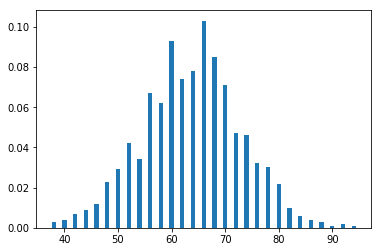

In [198]:
espacio_muestral_3, probs_gran_danes_pesos_3 = plot_normalized_histogram_sorted(pesos_por_2kg)

In [206]:
print(espacio_muestral_3)
print(probs_gran_danes_pesos_3)
print(len(espacio_muestral_3), 1000/len(espacio_muestral_3))

[ 38.  40.  42.  44.  46.  48.  50.  52.  54.  56.  58.  60.  62.  64.  66.
  68.  70.  72.  74.  76.  78.  80.  82.  84.  86.  88.  90.  92.  94.]
[ 0.003  0.004  0.007  0.009  0.012  0.023  0.029  0.042  0.034  0.067
  0.062  0.093  0.074  0.078  0.103  0.085  0.071  0.047  0.046  0.032
  0.03   0.022  0.01   0.006  0.004  0.003  0.001  0.002  0.001]
29 34.48275862068966


### Cuantos bins tengo?

29, en promedio cerca de 35 mediciones de pesos por bin

### Modelo

**Tipo de modelo**: De histograma  
**Cantidad de parámetros estimados**: 29  
**Espacio muestral**: Todos los pares desde 38 hasta 94

Reducimos la cantidad de parametros a casi la mitad pero nuestro modelo solo genera la mitad de nuestro espacio muestral, es decir, perdemos resolución en el peso

## Histogramas como densidades

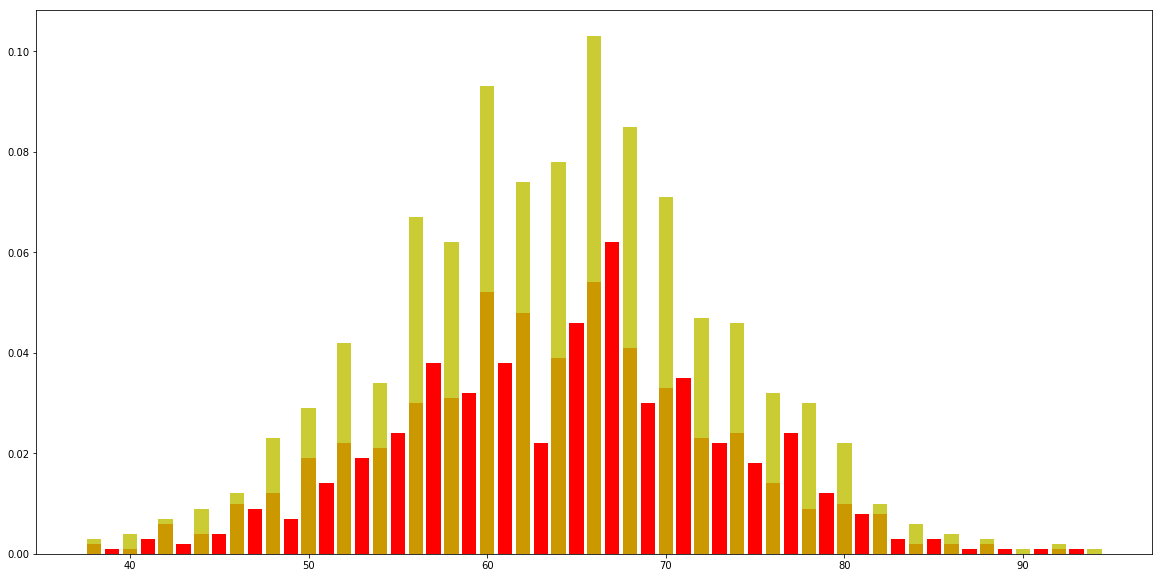

In [354]:
plt.figure(figsize=(20,10))
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color = 'r')
plt.bar(espacio_muestral_3, probs_gran_danes_pesos_3, color = 'y', alpha=0.8)
plt.show()

Se puede ver que el amarillo en promedio tiene el doble de altura que el rojo.
Por que?
- Por ejemplo, la barra en la posición 60 indicaría la probabilidad de que el peso este entre 59.5 y 61.5 para el amarillo, mientras que en el rojo indicaría la probabiliad de que el peso este entre 59.5 y 60.5

Para poder compararlos podemos graficar la probabilidad por unidad de peso

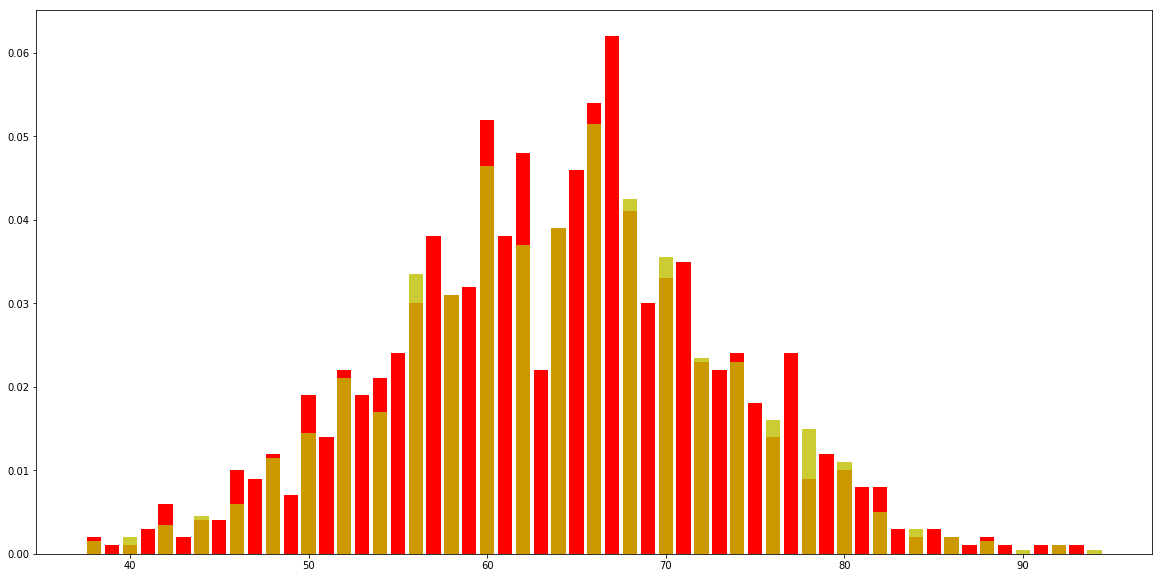

In [355]:
# Notar que dividimos probs_gran_danes_pesos_3 por 2
plt.figure(figsize=(20,10))
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color = 'r')
plt.bar(espacio_muestral_3, probs_gran_danes_pesos_3/2, color = 'y', alpha=0.8)
plt.show()

## Modelo Gaussiano

In [185]:
from scipy.stats import norm

### Estimamos media y desvio estandar

In [186]:
media_pesos = gran_danes_pesos.mean()
std_pesos = gran_danes_pesos.std()
print(media_pesos, std_pesos)

63.74477 9.16424628363


### PDF (Función de densidad de probabiliad Gaussiana)

In [284]:
rango_pesos = np.linspace(espacio_muestral_2[0], espacio_muestral_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos, media_pesos, std_pesos)

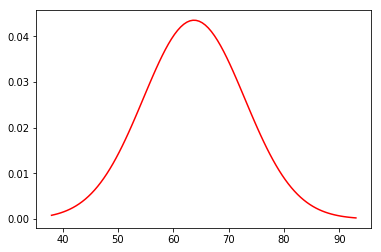

In [285]:
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.show()

### Comparado contra nuestro primer histograma

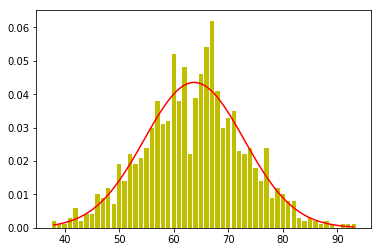

In [286]:
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color='y')
plt.show()

### Comparado contra nuestro segundo histograma

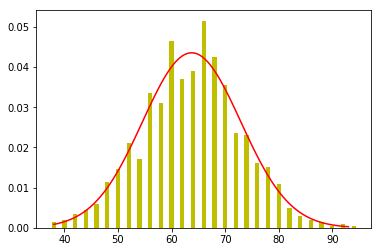

In [287]:
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.bar(espacio_muestral_3, probs_gran_danes_pesos_3/2, color='y')
plt.show()

Por que dividimos por 2?

La distribución Gaussiana es continua mientras que nuestros histogramas son discretos.

Las distribuciones continuas miden densidad de probabildad, es decir, probabilidad por unidad de peso en este caso.

En el ejemplo, el segundo histograma esta midiendo la probabilidad en 2Kg, por eso dividimos por 2

### Modelo

**Tipo de modelo**: Gaussiano  
**Cantidad de parámetros estimados**: 2 (Media y Desvio)  
**Espacio muestral**: Continuo

### Métodos estadísticos paramétricos vs no paramétricos
Se suele hacer esta distinción en estadistica refiriendose a paramétricos cuando podemos represeantar una distribución con parámetros, como por ejemplo la media y la varianza
- El histograma es una representación no paramétrica de la estimación de la distribución de probabilidad
- Existen otras formas como KDE (Kernel Density Estimation)

### Modelo generador Gaussiano:

In [288]:
print(media_pesos, std_pesos)

63.74477 9.16424628363


In [289]:
N = 10
np.random.normal(63.74477, 9.16424628363, N)

array([ 74.94622431,  61.54544236,  52.38189204,  63.05376695,
        76.84514131,  65.17920996,  61.19613968,  63.70316767,
        70.23664114,  63.22534512])

### Lo comparamos con el de Histograma

In [290]:
np.random.choice([ 38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  91.,  92.,  93.],  
                 size = 6000, 
                 p = [ 0.002,  0.001,  0.001,  0.003,  0.006,  0.002,  0.004,  0.004,
        0.01 ,  0.009,  0.012,  0.007,  0.019,  0.014,  0.022,  0.019,
        0.021,  0.024,  0.03 ,  0.038,  0.031,  0.032,  0.052,  0.038,
        0.048,  0.022,  0.039,  0.046,  0.054,  0.062,  0.041,  0.03 ,
        0.033,  0.035,  0.023,  0.022,  0.024,  0.018,  0.014,  0.024,
        0.009,  0.012,  0.01 ,  0.008,  0.008,  0.003,  0.002,  0.003,
        0.002,  0.001,  0.002,  0.001,  0.001,  0.001,  0.001], 
                 replace=True)

array([ 74.,  60.,  65., ...,  71.,  80.,  60.])

## Ventajas del modelo Gaussiano:
- Reduzco la cantidad de parámetros
- Generalización
- Espacio muestral continuo en contraposición con el discreto de los histogramas
- Teorema central del límite

Es mas preciso el modelo Gaussiano o el de histograma?

Que significa preciso? La precisión puede ser el enemigo